click run when you start

In [1]:
# install pykegg for connecting KEGG

In [2]:
%pip install pykegg plotnine matplotlib pillow
# %pip install --upgrade plotnine

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import libraries
import pykegg
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
# export to csv file which can use excel to open
import csv
# from google.colab import drive
# drive.mount('/content/drive')
import plotnine as p9

Source: https://pypi.org/project/pykegg/

Note:  Change the name of the file "mmu04115" to the desired pathway ID, which can refer to https://www.kegg.jp/pathway/mmu04115 

In [4]:
# Load the KEGG pathway (e.g., hsa03460)
g = pykegg.KGML_graph(pid="mmu04115")

# Export the pathway as an igraph 
# igraph: interaction between genes in the pathway (vertices and edges)
gra = g.get_graph()

# get the name of the nodes (genes) in the igraph
gname=gra.vs["name"]
gname=pd.DataFrame(gname)
# gname.to_csv('/content/drive/My Drive/gene_adj_mmu04115.csv', index=False) # change the name of the file "mmu04115"
gname.to_csv(r'C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\20202021-UTMJB\research experiments\Esther Tan\gene_adj_mmu04115.csv', index=False) 

# Export the pathway as an adjacency matrix
adj=pd.DataFrame(gra.get_adjacency())
# adj.to_csv('/content/drive/My Drive/adjacency matrix_mmu04115.csv') # change the name of the file "mmu04115"
adj.to_csv(r'C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\20202021-UTMJB\research experiments\Esther Tan\adjacency matrix_mmu04115.csv') # change the name of the file "mmu04115"

# Overlay the pathway on a raw image
nds = g.get_nodes()
nds = nds[nds.original_type == "gene"]

# list of genes in the pathway
name=pd.DataFrame(nds.name)
name1=(name['name'].str.split())
delimiter = ","  
names_flat = [name for sublist in name1 for name in sublist]
names_df = pd.DataFrame(names_flat, columns=["GeneName"])
# names_df.to_csv('/content/drive/My Drive/gene_list_mmu04115.csv', index=False)
names_df.to_csv(r'C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\20202021-UTMJB\research experiments\Esther Tan\gene_list_mmu04115.csv', index=False)

# Export the pathway as an image
nds["lfc"] = np.arange(-2, 2, 0.01)[0:nds.shape[0]]
cmap_grad = mpl.colors.LinearSegmentedColormap.from_list("cmap_grad", ["yellow", "green"])
norm = mpl.colors.Normalize(vmin=min(nds.lfc), vmax=max(nds.lfc))
nds["color"] = [mpl.colors.to_hex(cmap_grad(norm(x))) if x is not None else None for x in nds.lfc]
img=Image.fromarray(pykegg.overlay_opencv_image(nds, pid="mmu04115"))  # change the name of the file "mmu04115"
img.save(r'C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\20202021-UTMJB\research experiments\Esther Tan\gene_list_mmu04115.png')

# Plot the pathway using plotnine
# options.figure_size = (7, 5)
plt=pykegg.plot_kegg_pathway_plotnine(g, node_x_nudge=25, label_size=5, show_label="gene")
plt.save(r'C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\20202021-UTMJB\research experiments\Esther Tan\gene_list_mmu04115_plotnine.png') # change the name of the file "mmu04115"

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\20202021-UTMJB\research experiments\Esther Tan\gene_list_mmu04115_plotnine.png


gra is not None
gname is not None
nds is not None
nds['name'] is not None


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\20202021-UTMJB\research experiments\Esther Tan\gene_list_hsa00565_plotnine.png
C:\Users\user\AppData\Local\Temp\ipykernel_8552\832291874.py:84: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


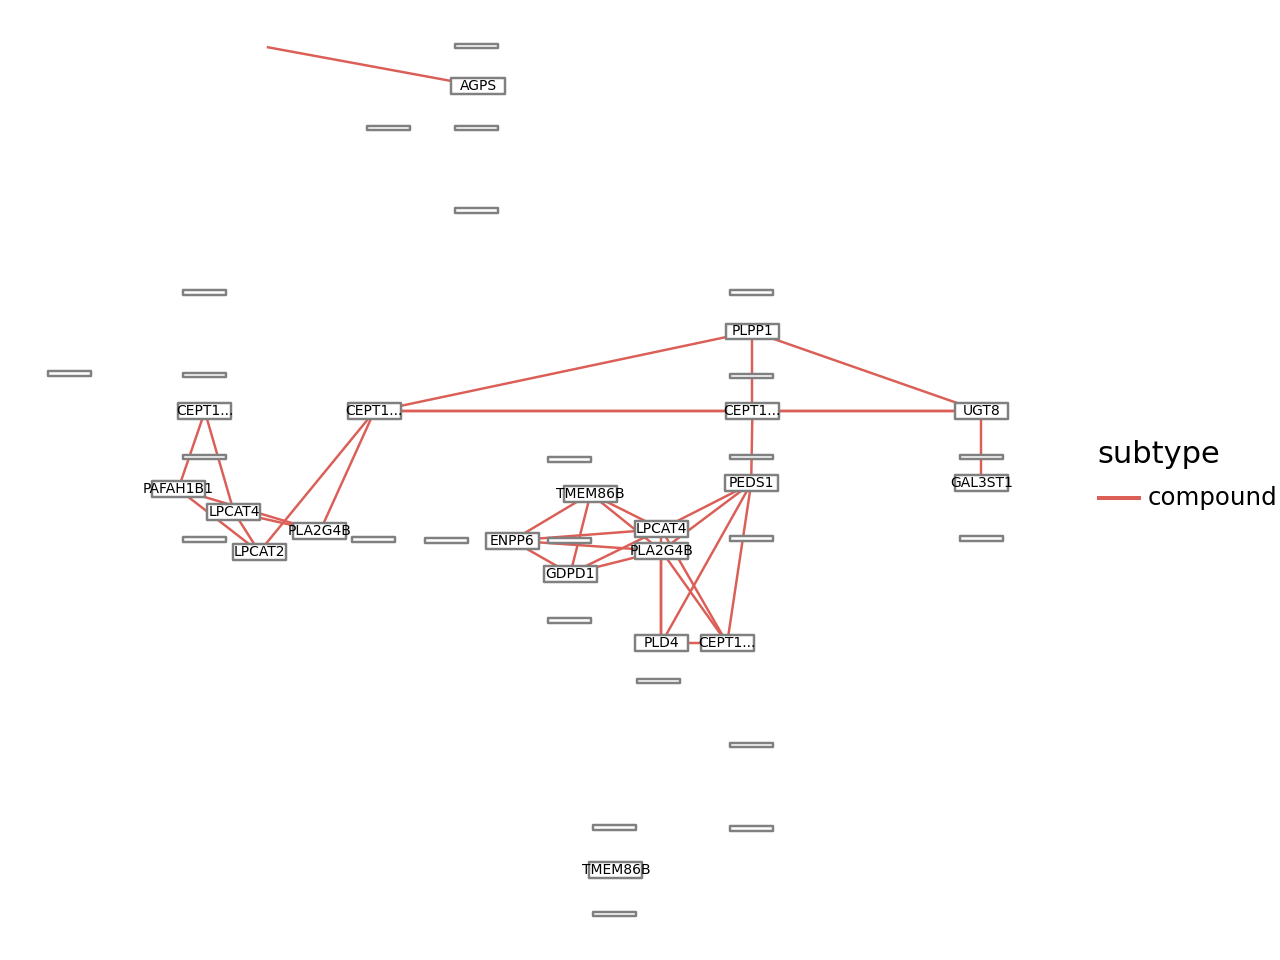

In [9]:
from igraph import plot
import plotnine
import requests_cache
import numpy as np
from PIL import Image
import pykegg
import matplotlib as mpl

## Be sure to cache all the downloaded files to avoid recursive querying
requests_cache.install_cache('pykegg_cache')
g = pykegg.KGML_graph(pid="hsa00565")

# Export the pathway as an igraph 
# igraph: interaction between genes in the pathway (vertices and edges)
gra = g.get_graph()
# print(gra)

# get the name of the nodes (genes) in the igraph
gname = gra.vs['name']
gname_df = pd.DataFrame(gname, columns=['name'])
gname_df.to_csv(r'C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\20202021-UTMJB\research experiments\Esther Tan\gene_adj_hsa00565.csv', index=False)
# gname_df.to_csv('/content/drive/My Drive/gene_adj_hsa00565.csv', index=False) # change the name of the file "hsa00565"

# Export the pathway as an adjacency matrix
adj = gra.get_adjacency()
# adj_df = pd.DataFrame(adj.todense()) 
adj_df = pd.DataFrame(adj)  # Convert to dense matrix if needed
adj_df.to_csv(r'C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\20202021-UTMJB\research experiments\Esther Tan\adjacency matrix_hsa00565.csv', index=False)
# adj_df.to_csv('/content/drive/My Drive/adjacency matrix_hsa00565.csv') # change the name of the file "hsa00565"

# Overlay the pathway on a raw image
nds = g.get_nodes()
nds = nds[nds.original_type == "gene"]

# list of genes in the pathway
# Flatten the list of gene names
names_flat = [item for sublist in nds['name'].str.split() for item in sublist]
names_df = pd.DataFrame(names_flat, columns=["GeneName"])
names_df.to_csv(r'C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\20202021-UTMJB\research experiments\Esther Tan\gene_list_hsa00565.csv', index=False)
# names_df.to_csv('/content/drive/My Drive/gene_list_hsa00565.csv', index=False)

# Export the pathway as an image
nds["lfc"] = np.arange(-2, 2, 0.01)[0:nds.shape[0]]
cmap_grad = mpl.colors.LinearSegmentedColormap.from_list("cmap_grad", ["yellow", "green"])
norm = mpl.colors.Normalize(vmin=min(nds.lfc), vmax=max(nds.lfc))
nds["color"] = [mpl.colors.to_hex(cmap_grad(norm(x))) if x is not None else None for x in nds.lfc]
overlay_image = pykegg.overlay_opencv_image(nds, pid="hsa00565")
img = Image.fromarray(overlay_image)
img.save(r'C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\20202021-UTMJB\research experiments\Esther Tan\gene_list_hsa00565.png')
# img.save('/content/drive/My Drive/gene_list_hsa00565.png')

# Check if gra is None
gra = g.get_graph()
if gra is None:
    print("Error: gra is None")
else:
    print("gra is not None")

# Check if gname is None
gname = gra.vs['name']
if gname is None:
    print("Error: gname is None")
else:
    print("gname is not None")

# Check if nds is None
nds = g.get_nodes()
if nds is None:
    print("Error: nds is None")
else:
    print("nds is not None")

# Check if nds['name'] is None
if nds['name'] is None:
    print("Error: nds['name'] is None")
else:
    print("nds['name'] is not None")


# Plot the pathway using plotnine
# options.figure_size = (7, 5)
plt=pykegg.plot_kegg_pathway_plotnine(g, node_x_nudge=25, label_size=5, show_label="gene")
plt.save(r'C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\20202021-UTMJB\research experiments\Esther Tan\gene_list_hsa00565_plotnine.png') # change the name of the file "hsa00565"
print(plt)
# from plotnine import ggplot, aes, geom_point, scale_color_identity, theme_void

# Ensure 'x', 'y', and 'color' are correctly defined
# df_nodes = pd.DataFrame({
#    'x': nds['x'],  # Ensure you have x-coordinates
#    'y': nds['y'],  # Ensure you have y-coordinates
#    'color': nds['color']
# })

# plot = (
#    ggplot(df_nodes, aes(x='x', y='y', color='color')) +
#    geom_point(size=5) +
#    scale_color_identity() +
#    theme_void()
#)
# print(plot)

In [6]:
%pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [7]:
from Bio import Entrez

# Always tell NCBI who you are
Entrez.email = "hwnies2@live.utm.my"

def symbol_to_entrez(symbols):
    # Initialize a dictionary to store the mapping
    symbol_to_entrez_dict = {}

    for symbol in symbols:
        # Use Entrez esearch to get Entrez ID for each symbol
        handle = Entrez.esearch(db="gene", term=symbol, retmode="xml")
        records = Entrez.read(handle)
        
        # Extract Entrez ID
        if records["IdList"]:
            entrez_id = records["IdList"][0]
            symbol_to_entrez_dict[symbol] = entrez_id
        else:
            symbol_to_entrez_dict[symbol] = None
    
    return symbol_to_entrez_dict

# Example usage
gene_symbols = ["TP53", "BRCA1", "EGFR"]  # Replace with your gene symbols
symbol_to_entrez_mapping = symbol_to_entrez(gene_symbols)
print(symbol_to_entrez_mapping)


{'TP53': '7157', 'BRCA1': '7157', 'EGFR': '7157'}


In [8]:
from Bio import Entrez

# Always tell NCBI who you are
Entrez.email = "hwnies2@live.utm.my"

def entrez_to_symbol(entrez_ids):
    # Convert list of Entrez IDs to a comma-separated string
    id_list = ",".join(entrez_ids)
    
    # Use Entrez esummary to get gene information
    handle = Entrez.esummary(db="gene", id=id_list, retmode="xml")
    records = Entrez.read(handle)
    
    # Debugging: Print the structure of the returned records
    # print(records)
    
    # Extract gene symbols
    gene_symbols = {}
    for record in records['DocumentSummarySet']['DocumentSummary']:
        # print(record)  # Debugging: Print each record to inspect its structure
        entrez_id = record.attributes['uid']
        gene_symbol = record.get('NomenclatureSymbol', 'N/A')  # Use .get() to avoid KeyError
        gene_symbols[entrez_id] = gene_symbol
    
    return gene_symbols

# Example usage
entrez_ids = ["8611", "8540", "5048", "8681"]  # Replace with your Entrez IDs
gene_symbols = entrez_to_symbol(entrez_ids)
print(gene_symbols)

{'8611': 'PLPP1', '8540': 'AGPS', '5048': 'PAFAH1B1', '8681': 'JMJD7-PLA2G4B'}
